**Predict average math exam results for students of the tutors**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

**original data**

In [2]:
train = pd.read_csv('train.csv', index_col = 0)  
train.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
Id,,,,,,,,,,,
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [3]:
test_original = pd.read_csv('test.csv', index_col = 0)  
test_original.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
Id,,,,,,,,,,
10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


**checking data for outliers**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11)
memory usage: 937.5 KB


In [5]:
train.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800
std,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823
min,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


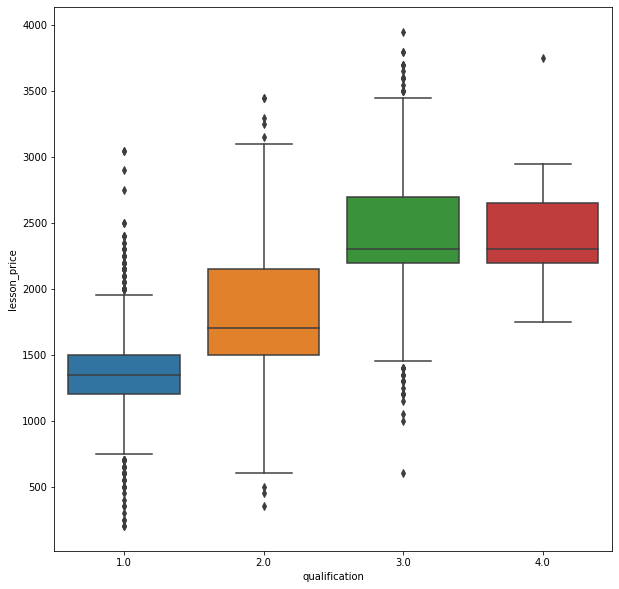

In [6]:
plt.figure(figsize=(10,10))
sns.boxplot(train.qualification, train.lesson_price)

In [7]:
Q3 = train[(train['qualification']==1)]['lesson_price'].quantile(0.75)
Q1 = train[(train['qualification']==1)]['lesson_price'].quantile(0.25)
IQR = Q3 - Q1

In [8]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
train[(train['qualification']==1)] = train[(train['qualification']==1)].query('lesson_price <= (@Q3 + 1.5 * @IQR)')

In [9]:
Q3 = train[(train['qualification']==2)]['lesson_price'].quantile(0.75)
Q1 = train[(train['qualification']==2)]['lesson_price'].quantile(0.25)
IQR = Q3 - Q1

In [10]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
train[(train['qualification']==2)] = train[(train['qualification']==2)].query('(@Q1 - 1.5 * @IQR) <= lesson_price <= (@Q3 + 1.5 * @IQR)')

In [11]:
Q3 = train[(train['qualification']==3)]['lesson_price'].quantile(0.75)
Q1 = train[(train['qualification']==3)]['lesson_price'].quantile(0.25)
IQR = Q3 - Q1

In [12]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
train[(train['qualification']==3)] = train[(train['qualification']==3)].query('(@Q1 - 1.5 * @IQR) <= lesson_price <= (@Q3 + 1.5 * @IQR)')

In [13]:
Q3 = train[(train['qualification']==4)]['lesson_price'].quantile(0.75)
Q1 = train[(train['qualification']==4)]['lesson_price'].quantile(0.25)
IQR = Q3 - Q1

In [14]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
train[(train['qualification']==4)] = train[(train['qualification']==4)].query('(@Q1 - 1.5 * @IQR) <= lesson_price <= (@Q3 + 1.5 * @IQR)')

In [15]:
train = train[train['lesson_price'].notna()]

Split train dataset on features and answers

In [16]:
y = train['mean_exam_points']
y.head()

Id
0    63.0
1    86.0
2    53.0
3    56.0
4    59.0
Name: mean_exam_points, dtype: float64

In [17]:
y = pd.DataFrame.to_numpy(y)

In [18]:
grouped_by_score = (train.groupby(pd.cut(train['mean_exam_points'], [30,40,50,60,70,80,90,100], right=False)).mean())

In [19]:
train.drop('mean_exam_points', axis=1, inplace=True)
train.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
Id,,,,,,,,,,
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Check features' correlation**

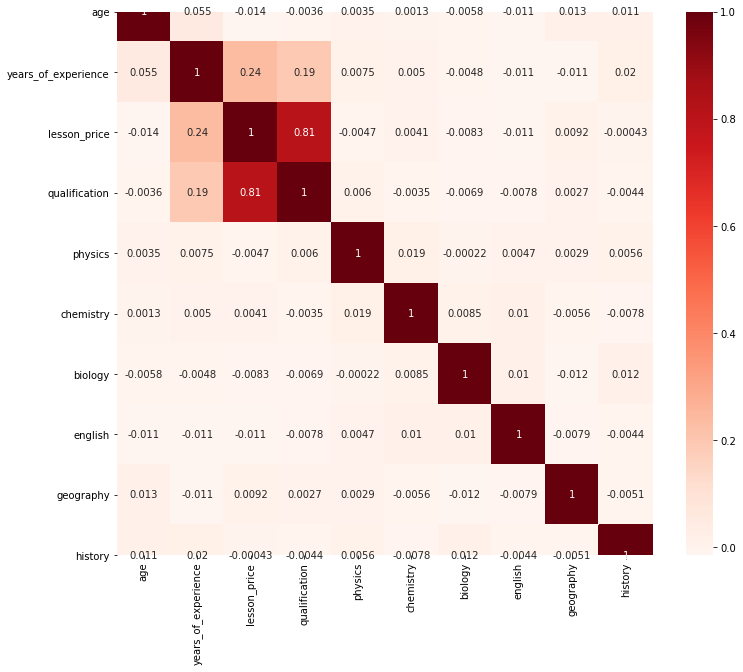

In [20]:
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

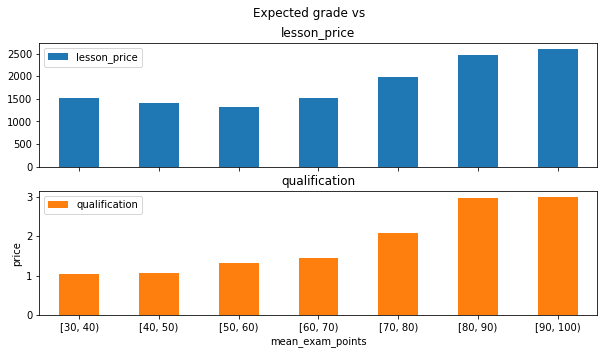

In [21]:
ax = grouped_by_score.plot.bar(rot=0, y=["lesson_price", "qualification"], title="Expected grade vs", subplots=True, figsize=(10,5))
plt.ylabel('price')
plt.title('qualification')
plt.show()

In [22]:
train.drop('qualification', axis=1, inplace=True)

In [23]:
train = train[['lesson_price', 'years_of_experience', 'physics']]

In [24]:
train = pd.DataFrame.to_numpy(train)

**Features' standardization**

In [25]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(train, axis=0)
stds = np.std(train, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(train.shape[0]):
    for j in range(train.shape[1]):
        train[i][j] = (train[i][j] - means[j])/stds[j]

In [26]:
train

array([[-0.56634002, -1.11816688,  1.2917606 ],
       [ 2.23851537,  1.16020973,  1.2917606 ],
       [-0.95321662, -1.11816688, -0.77413725],
       ...,
       [-0.85649747, -0.54857273,  1.2917606 ],
       [-1.14665493,  0.59061557, -0.77413725],
       [-0.46962087, -1.11816688, -0.77413725]])

**Split the dataset on training and testing subsets for 75 to 25%**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.25)

Training algorithyms for regression

Use $L_{2}$ loss $L(y, z) = (y-z)^{2},$ it's derevative by $z$ will look like $L'(y, z) = 2(z-y)$. So will implement it as function (can get rid of 2*).

In [28]:
def bias(y, z):
    return (y - z)

Mean squared error will be used as a quality indicator.

In [29]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [30]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [31]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [32]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [33]:
# Число деревьев в ансамбле
n_trees = 15

# для простоты примем коэффициенты равными 1
coefs = [0.9] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [34]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [35]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 15 деревьев глубиной 3     с шагом 0.5 на тренировочной выборке: 53.26562357322687
Ошибка алгоритма из 15 деревьев глубиной 3     с шагом 0.5 на тестовой выборке: 56.36603056612405


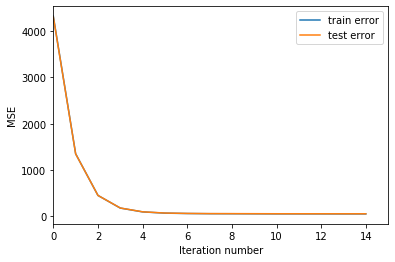

In [36]:
get_error_plot(n_trees, train_errors, test_errors)

**Make final prediction on test dataset**

In [37]:
test_original.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000
mean,45.97280,1.980000,1697.095000,1.709400,0.38130,0.123500,0.120100,0.056000,0.031400,0.0184
std,7.95628,1.783289,524.262621,0.793483,0.48573,0.329027,0.325095,0.229933,0.174405,0.1344
min,23.00000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,41.00000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,46.00000,2.000000,1500.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
75%,51.00000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0000
max,68.00000,10.000000,4050.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0000


**Change all outliers to average lesson_price for quallification group (Added 1% of accuracy)**

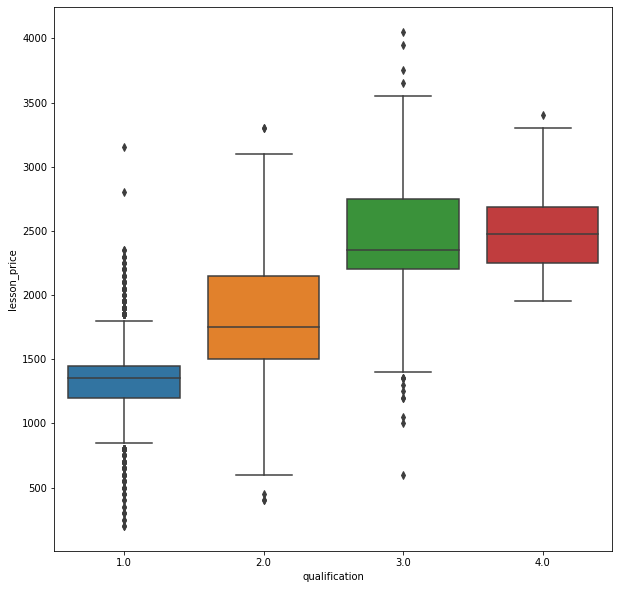

In [38]:
plt.figure(figsize=(10,10))
sns.boxplot(test_original.qualification, test_original.lesson_price)

In [39]:
Q3 = test_original[(test_original['qualification']==1)]['lesson_price'].quantile(0.75)
Q1 = test_original[(test_original['qualification']==1)]['lesson_price'].quantile(0.25)
IQR = Q3 - Q1

In [40]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
test_original.loc[((Q3 + 1.5 * IQR) <= test_original['lesson_price'])
                  & (test_original.qualification == 1), 'lesson_price'] = test_original[(test_original['qualification']==1)]['lesson_price'].mean()

In [41]:
Q3 = test_original[(test_original['qualification']==2)]['lesson_price'].quantile(0.75)
Q1 = test_original[(test_original['qualification']==2)]['lesson_price'].quantile(0.25)
IQR = Q3 - Q1

In [42]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
test_original.loc[(((Q1 - 1.5 * IQR) >= test_original['lesson_price']) |
                  ((Q3 + 1.5 * IQR) <= test_original['lesson_price']))
                  & (test_original.qualification == 2), 'lesson_price'] = test_original[(test_original['qualification']==2)]['lesson_price'].mean()

In [43]:
Q3 = test_original[(test_original['qualification']==3)]['lesson_price'].quantile(0.75)
Q1 = test_original[(test_original['qualification']==3)]['lesson_price'].quantile(0.25)
IQR = Q3 - Q1

In [44]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
test_original.loc[(((Q1 - 1.5 * IQR) >= test_original['lesson_price']) |
                  ((Q3 + 1.5 * IQR) <= test_original['lesson_price']))
                  & (test_original.qualification == 3), 'lesson_price'] = test_original[(test_original['qualification']==3)]['lesson_price'].mean()

In [45]:
Q3 = test_original[(test_original['qualification']==4)]['lesson_price'].quantile(0.75)
Q1 = test_original[(test_original['qualification']==4)]['lesson_price'].quantile(0.25)
IQR = Q3 - Q1

In [46]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
test_original.loc[(((Q1 - 1.5 * IQR) >= test_original['lesson_price']) |
                  ((Q3 + 1.5 * IQR) <= test_original['lesson_price']))
                  & (test_original.qualification == 4), 'lesson_price'] = test_original[(test_original['qualification']==4)]['lesson_price'].mean()

**Drop highly correlated feature**

In [47]:
test_original.drop('qualification', axis=1, inplace=True)

In [48]:
test_original = test_original[['lesson_price', 'years_of_experience', 'physics']]

In [49]:
test = pd.DataFrame.to_numpy(test_original)

**Standardization**

In [50]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(test, axis=0)
stds = np.std(test, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(test.shape[0]):
    for j in range(test.shape[1]):
        test[i][j] = (test[i][j] - means[j])/stds[j]

In [51]:
final_prediction_score = gb_predict(test, trees, coefs, eta)

In [52]:
test = pd.DataFrame({'Id': test_original.index,
                       'mean_exam_points': final_prediction_score.flatten()})

test

,Id,mean_exam_points
0,10000,54.415104
1,10001,62.294894
2,10002,52.924316
3,10003,89.983718
4,10004,88.793674
...,...,...
9995,19995,49.246840
9996,19996,75.717537
9997,19997,54.574895
9998,19998,64.080456


In [53]:
test.loc[:, ['Id', 'mean_exam_points']].to_csv('mean_math_exam_points.csv', float_format='%.1f', index = False)